<a href="https://colab.research.google.com/github/R786P/data-science-roadmap-2025_2026/blob/main/13_time_series/01_trends_seasonality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pygit2==1.15.1
%cd /content
!git clone https://github.com/lllyasviel/Fooocus.git
%cd /content/Fooocus
!python entry_with_update.py --share --always-high-vram

📈 Time Series Data (Monthly Sales)
                 sales
date                  
2023-01-31  112.483571
2023-02-28  121.047809
2023-03-31  134.037212
2023-04-30  142.832541
2023-05-31  133.106263


/tmp/ipython-input-1595239757.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2023-01-01', periods=24, freq='M')


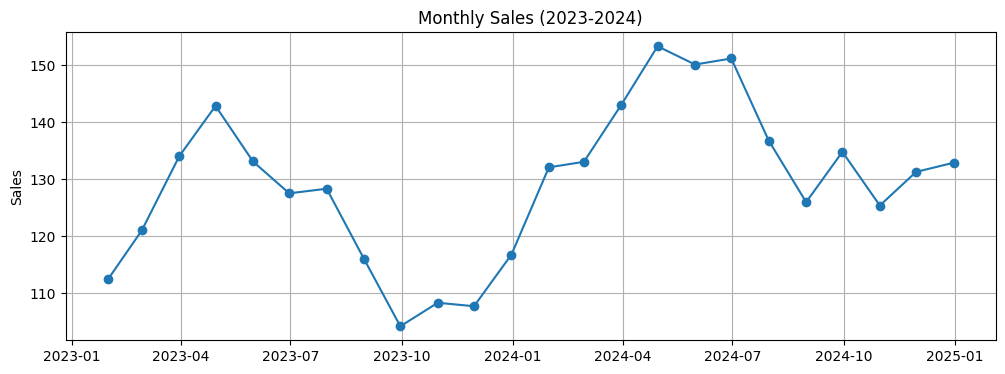

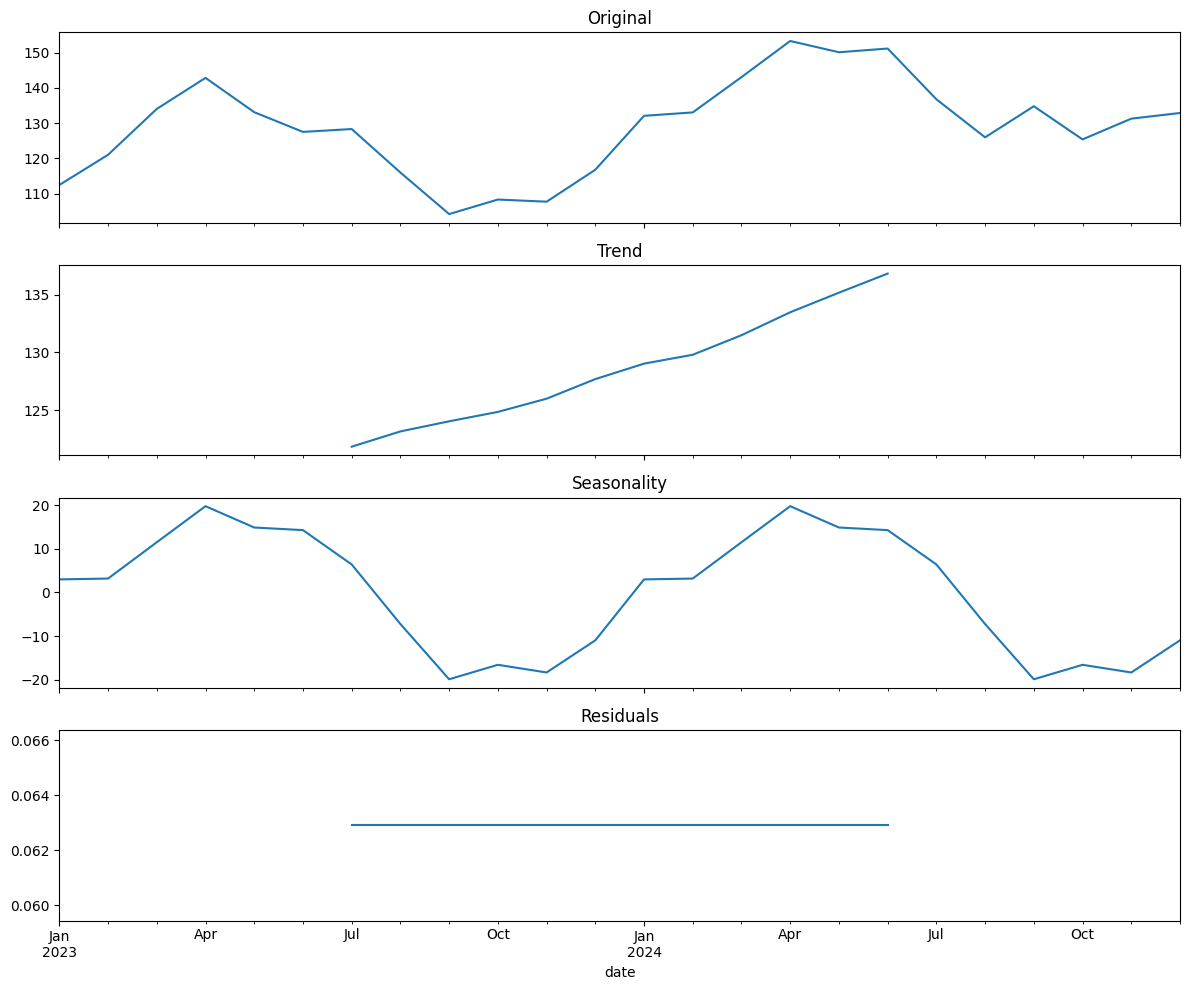


✅ Time Series Decomposition Complete!
You can see:
- Trend: Upward movement
- Seasonality: Peaks every 12 months


In [12]:

# 13_time_series/01_trends_seasonality.ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Create synthetic monthly sales data (2 years)
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=24, freq='M')
sales = (
    100 +                    # base
    np.linspace(10, 50, 24) + # trend
    20 * np.sin(2 * np.pi * np.arange(24) / 12) + # seasonality
    np.random.normal(0, 5, 24)  # noise
)
df = pd.DataFrame({'date': dates, 'sales': sales})
df.set_index('date', inplace=True)

print("📈 Time Series Data (Monthly Sales)")
print(df.head())

# Plot original data
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['sales'], marker='o')
plt.title('Monthly Sales (2023-2024)')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Decompose into Trend, Seasonal, Residual
try:
    decomposition = seasonal_decompose(df['sales'], model='additive', period=12)

    fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
    decomposition.observed.plot(ax=axes[0], title='Original')
    decomposition.trend.plot(ax=axes[1], title='Trend')
    decomposition.seasonal.plot(ax=axes[2], title='Seasonality')
    decomposition.resid.plot(ax=axes[3], title='Residuals')
    plt.tight_layout()
    plt.show()

    print("\n✅ Time Series Decomposition Complete!")
    print("You can see:")
    print("- Trend: Upward movement")
    print("- Seasonality: Peaks every 12 months")
except Exception as e:
    print(f"Note: Full decomposition requires more data. Basic plot shown.")